In [1]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
batch_size = 32
dropout = 0.5
epochs = 10
learning_rate = 0.001
momentum = 0.9
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [4]:
data_train = torchvision.datasets.CIFAR10(root='.', 
                                        train=True,
                                        download=True, 
                                        transform=transform)

len(data_train)

Files already downloaded and verified


50000

In [5]:
data_test = torchvision.datasets.CIFAR10(root='.', 
                                         train=False,
                                         download=True, 
                                         transform=transform)
len(data_test)

Files already downloaded and verified


10000

In [6]:
data_loader_train = torch.utils.data.DataLoader(dataset=data_train,
                                                batch_size = batch_size,
                                                shuffle = True)

data_loader_test = torch.utils.data.DataLoader(dataset=data_test,
                                               batch_size = batch_size,
                                               shuffle = True)


In [7]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

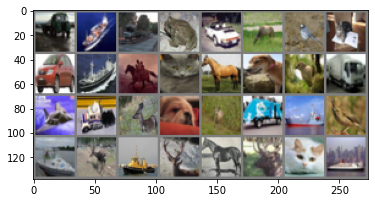

['truck', 'ship', 'truck', 'frog', 'car', 'deer', 'bird', 'cat', 'car', 'ship', 'horse', 'cat', 'horse', 'dog', 'bird', 'truck', 'plane', 'truck', 'deer', 'dog', 'deer', 'truck', 'ship', 'bird', 'ship', 'deer', 'ship', 'deer', 'horse', 'deer', 'cat', 'ship']


In [8]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

dataiter = iter(data_loader_train)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print([classes[labels[i].item()] for i in range(batch_size)])

In [9]:
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()

        self.conv1 = nn.Sequential(
            nn.Conv2d(3,6,5),
            nn.ReLU(),
            nn.MaxPool2d(2,2)
        )

        self.conv2 = nn.Sequential(
            nn.Conv2d(6,16,5),
            nn.ReLU(),
            nn.MaxPool2d(2,2)
        )

        self.fc1 = nn.Sequential(
            nn.Linear(16*5*5,120),
            nn.ReLU()
        )
        
        self.fc2 = nn.Sequential(
            nn.Linear(120,84),
            nn.ReLU()
        )
 
        self.fc3 = nn.Linear(84,10)

    def forward(self,x):
        x = self.conv1(x)
        x = self.conv2(x)
 
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x


In [10]:
model = LeNet5().to(device)

In [11]:
cost = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [12]:
for epoch in range(epochs):
    
    running_loss = 0.0
    running_correct = 0.0
    print("Epoch {}/{}".format(epoch+1, epochs))
    print("-"*10)
    for data in data_loader_train:
        x_train, y_train = data
        x_train, y_train = Variable(x_train).to(device), Variable(y_train).to(device)
        outputs = model(x_train)
        _,pred = torch.max(outputs.data, 1)
        optimizer.zero_grad()
        loss = cost(outputs, y_train)
        
        loss.backward()
        optimizer.step()
        running_loss += loss.data.item()
        running_correct += torch.sum(pred == y_train.data)
    
    testing_correct = 0.0
    for data in data_loader_test:
        x_test, y_test = data
        x_test, y_test = Variable(x_test).to(device), Variable(y_test).to(device)
        outputs = model(x_test)
        _, pred = torch.max(outputs.data, 1)
        testing_correct += torch.sum(pred == y_test.data)
    print("Loss is: {:.8f}, Train Accuracy is: {:.2f}%, Test Accuracy is: {:.2f}%\n".format(running_loss/len(data_train),
                                                                                            running_correct/len(data_train)*100,
                                                                                            testing_correct/len(data_test)*100))
# torch.save(model.state_dict(), "model_parameter.pkl")

Epoch 1/10
----------
Loss is: 0.05012337, Train Accuracy is: 41.07%, Test Accuracy is: 47.51%

Epoch 2/10
----------
Loss is: 0.04059782, Train Accuracy is: 53.32%, Test Accuracy is: 55.58%

Epoch 3/10
----------
Loss is: 0.03667425, Train Accuracy is: 58.43%, Test Accuracy is: 57.68%

Epoch 4/10
----------
Loss is: 0.03406187, Train Accuracy is: 61.50%, Test Accuracy is: 60.52%

Epoch 5/10
----------
Loss is: 0.03215236, Train Accuracy is: 63.88%, Test Accuracy is: 60.23%

Epoch 6/10
----------
Loss is: 0.03059671, Train Accuracy is: 65.36%, Test Accuracy is: 61.82%

Epoch 7/10
----------
Loss is: 0.02920193, Train Accuracy is: 66.89%, Test Accuracy is: 63.07%

Epoch 8/10
----------
Loss is: 0.02806827, Train Accuracy is: 68.17%, Test Accuracy is: 62.40%

Epoch 9/10
----------
Loss is: 0.02699178, Train Accuracy is: 69.67%, Test Accuracy is: 63.09%

Epoch 10/10
----------
Loss is: 0.02603084, Train Accuracy is: 70.49%, Test Accuracy is: 62.91%



Pred Label is: ['dog', 'deer', 'bird', 'truck', 'bird', 'cat', 'horse', 'dog', 'ship', 'car']
Real Label is: ['cat', 'deer', 'bird', 'truck', 'cat', 'ship', 'horse', 'horse', 'ship', 'car']


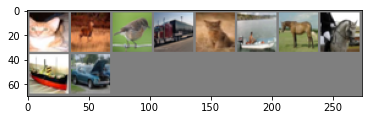

In [13]:
data_loader_test = torch.utils.data.DataLoader(dataset=data_test,
                                               batch_size = 10,
                                               shuffle = True)
x_test, y_test = next(iter(data_loader_test))
inputs = Variable(x_test).to(device)
pred = model(inputs)
_,pred = torch.max(pred, 1)

print("Pred Label is:", [classes[i.item()] for i in pred.data])
print("Real Label is:", [classes[i.item()] for i in y_test])

img = torchvision.utils.make_grid(x_test)
img = img.numpy().transpose(1,2,0)

std = (0.5)
mean = (0.5)
img = img*std+mean
plt.imshow(img)